# Analysis of Chest X-Ray images

Neural networks have revolutionised image processing in several different domains. Among these is the field of medical imaging. 

The objective of this project is to identify images where an ```"effusion"``` is present. This is a image classification problem, where we will be dealing with two classes - ```"effusion"``` and ```"nofinding"```. Here, the latter represents a "normal" X-ray image.

This same methodology can be used to spot various other illnesses that can be detected via a chest x-ray. 

```"effusion"``` - It's an abnormal collection of fluid in hollow spaces or between tissues of the body. For example, a pleural effusion is a collection of fluid between the two layers of membrane covering the lungs.

In [ ]:
# import all the necessary files and packages

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

import datetime

from PIL import Image
import imageio
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATASET_PATH = r'D:\CXR_Data_1'

# There are two classes of images that we have to deal with
disease_cls = ['effusion', 'nofinding']

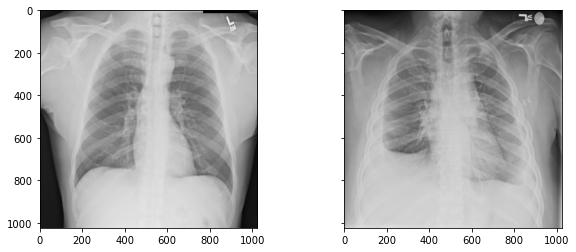

In [ ]:
no_finding_image=cv2.imread(r'D:\CXR_Data_1\training_set\nofinding\00006589_000.png')
effusion_image=cv2.imread(r'D:\CXR_Data_1\training_set\effusion\00006592_000.png')

f, axes = plt.subplots(1, 2, sharey=True)
f.set_figwidth(10)
    
axes[0].imshow(no_finding_image)
axes[1].imshow(effusion_image)

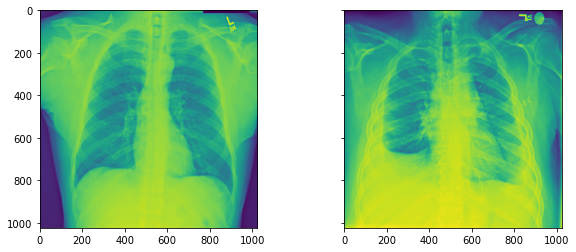

In [ ]:
no_finding_image_gray=cv2.cvtColor(no_finding_image,cv2.COLOR_BGR2GRAY)
effusion_image_gray=cv2.cvtColor(effusion_image,cv2.COLOR_BGR2GRAY)

f, axes = plt.subplots(1, 2, sharey=True)
f.set_figwidth(10)
    
axes[0].imshow(no_finding_image_gray)
axes[1].imshow(effusion_image_gray)

In [ ]:
effusion_image.shape

(1024, 1024, 3)

In [ ]:
no_finding_image.shape

(1024, 1024, 3)

In [ ]:
def my_min_max(image):
    image=np.array(image)
    image=(image - image.min())/(image.max()-image.min())
    return image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_gen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0,
    height_shift_range=0,
    vertical_flip=False,
    preprocessing_function=my_min_max,
    validation_split=0.1)

In [ ]:
#test_image_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_image_gen.flow_from_directory(r'D:\CXR_Data_1\training_set',
                                   target_size=(100,100),
                                   batch_size=32,class_mode='categorical',subset='training')


validation_generator = train_image_gen.flow_from_directory(r'D:\CXR_Data_1\training_set',
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

print(train_generator.class_indices)

Found 997 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
{'effusion': 0, 'nofinding': 1}


In [ ]:
def VGGUpdate(input_tensor=None,classes=2):
    img_rows,img_cols = 100,100
    img_channels = 3
    img_dim = (img_rows,img_cols,img_channels)
    img_input = Input(shape=img_dim)
    
    x = Conv2D(64,(3,3),activation='relu',padding='same')(img_input)
    x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x)
    
    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x)
    
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x)
    
    
    x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x)
    

    x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x)
    
    x = Flatten()(x)
    BatchNormalization()(x)
    Dropout(0.8)(x)
    x = Dense(4096,activation='relu')(x)
    BatchNormalization()(x)
    Dropout(0.8)(x)
    x = Dense(4096,activation='relu')(x)
    x = Dense(classes,activation='softmax')(x)
    
    model = Model(img_input,x,)
    return model

In [ ]:
model = VGGUpdate(classes=2)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0     

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
call = ReduceLROnPlateau(monitor='accuracy', 
                         factor=0.1, 
                         patience=2, 
                         verbose=1, 
                         mode='auto', 
                         min_delta=0.0001, 
                         cooldown=0, 
                         min_lr=0.0001)

In [ ]:
filepath = r'D:/CXR_best_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, 
                             monitor='accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='auto')

In [ ]:
history=model.fit_generator(train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 5,callbacks=[checkpoint,call])

Epoch 1/5
31/31 [==============================] - 208s 7s/step - loss: 0.4057 - accuracy: 0.8933 - val_loss: 0.3125 - val_accuracy: 0.9062

Epoch 00001: accuracy improved from -inf to 0.89326, saving model to D:/CXR_best_weights.hdf5
Epoch 2/5
31/31 [==============================] - 200s 6s/step - loss: 0.3307 - accuracy: 0.9016 - val_loss: 0.3407 - val_accuracy: 0.8958

Epoch 00002: accuracy improved from 0.89326 to 0.90155, saving model to D:/CXR_best_weights.hdf5
Epoch 3/5
31/31 [==============================] - 239s 8s/step - loss: 0.3275 - accuracy: 0.9005 - val_loss: 0.3342 - val_accuracy: 0.8958

Epoch 00003: accuracy did not improve from 0.90155
Epoch 4/5
31/31 [==============================] - 254s 8s/step - loss: 0.3261 - accuracy: 0.9016 - val_loss: 0.3111 - val_accuracy: 0.9062

Epoch 00004: accuracy did not improve from 0.90155

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/5
31/31 [==============================] - 223s 7s/st

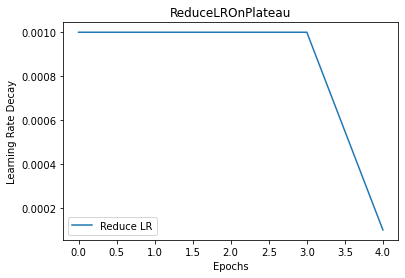

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Learning Rate Decay')
plt.title('ReduceLROnPlateau')
plt.plot(history.history['lr'],label='Reduce LR')
plt.legend()

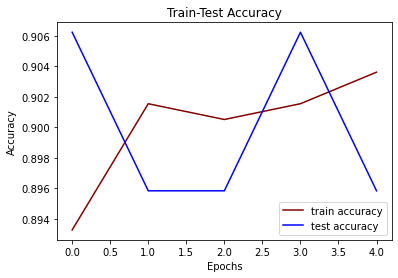

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy')
plt.plot(history.history['accuracy'],label='train accuracy',color='maroon')
plt.plot(history.history['val_accuracy'],label='test accuracy',color='blue')
plt.legend()

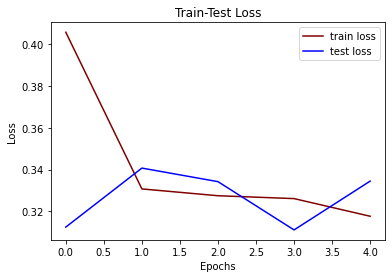

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train-Test Loss')
plt.plot(history.history['loss'],label='train loss',color='maroon')
plt.plot(history.history['val_loss'],label='test loss',color='blue')
plt.legend()

In [ ]:
from tensorflow.keras.models import load_model,save_model

In [ ]:
weight_model = model.load_weights(filepath)

In [ ]:
import cv2

In [ ]:
img = cv2.imread(r'D:\CXR_Data\effusion\00006744_000.png')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img = cv2.resize(img,(100,100))

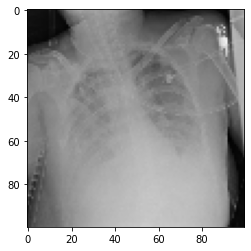

In [ ]:
plt.imshow(img)

In [ ]:
img=img[np.newaxis,...]
img.shape

(1, 100, 100, 3)

In [ ]:
model.predict(img)

array([[0.09188917, 0.9081108 ]], dtype=float32)

In [ ]:
# Convert the model into TFLite version

#converter=tf.lite.TFLiteConverter.from_keras_model(model)

#tflite_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\pc\AppData\Local\Temp\tmp_ud6v78n\assets


In [ ]:
save_model(model,filepath=r'd:\keras_model.hdf5')

In [ ]:
#with open('d:\model.tflite','wb') as f:
 #   f.write(tflite_model)

In [ ]:
#with open('d:\model.tflite','rb') as f2:
 #   model2 = f2.

In [ ]:
#model2.predict(img)

AttributeError: 'bytes' object has no attribute 'predict'

In [ ]:
load_keras=load_model(filepath=r'd:\keras_model.hdf5')

In [ ]:
class_probs=load_keras.predict(img)

In [ ]:
np.argmax(class_probs)

1